In [1]:
import numpy as np
from astropy.io import fits
from scipy.ndimage import rotate
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import aplpy
from matplotlib.patches import Rectangle
from astropy.visualization import (MinMaxInterval, AsinhStretch)
from astropy.wcs import WCS
from astropy.visualization import wcsaxes
from astropy import units as u
import pandas as pd
#from astropy.visualization import astropy_mpl_style

In [2]:
# Meassurent the flux in pseudo slit
def pseudo_slit(image_data, y_start, y_end, x_start, x_end, rotation_angle):
    # Define the pseudo-slit coordinates
    slit_mask = np.zeros_like(image_data)
    slit_mask[y_start:y_end, x_start:x_end] = 1  # Set pixels within the slit region to 1

    # Rotate the image data by the specified angle
    rotated_data = rotate(image_data, rotation_angle, reshape=False)

    # Calculate the flux within the rotated pseudo-slit
    flux_within_slit = np.sum(rotated_data * slit_mask)
    return flux_within_slit

In [3]:
# Ploting the image and slit
# Create the pseudo-slit rectangle
#plt.style.use(astropy_mpl_style)
def plot_slit_with_aplpy(image_data, y_start, y_end, x_start, x_end, rotation_angle, vmin, vmax):
    plt.clf()
    fig = plt.figure(figsize=(18, 9))

    # Create Aplpy FITSFigure instance
    f = aplpy.FITSFigure(image_data, figure=fig, subplot=(1, 1, 1), north=True)

    # Show the image
    #f.show_grayscale( vmin=vmin, vmax=vmax, invert=True)#, vmin=vmin, vmax=vmax)
    # Show the image with a specific colormap and color bar
    f.show_colorscale(cmap='viridis', vmin=vmin, vmax=vmax)
    f.add_colorbar()
    f.colorbar.set_location("right")
    f.colorbar.set_axis_label_text(r"F(F$\alpha$ + [NII])")
    f.colorbar.set_font(size='x-large',  weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
    f.colorbar.set_axis_label_font(size=18)#, weight='bold')
    
    # Get the FITSFigure instance's axis to add the rectangle
    ax = f.ax

    # Create the rectangle for pseudo-slit
    pseudo_slit_rect = plt.Rectangle((x_start, y_start), x_end - x_start, y_end - y_start,
                                     angle=0, edgecolor='red', facecolor='none')

    # Add the pseudo-slit rectangle to the plot
    ax.add_patch(pseudo_slit_rect)

    # Apply rotation to the pseudo-slit without changing its position
    trans = plt.matplotlib.transforms.Affine2D().rotate_deg_around(x_start + (x_end - x_start) / 2,
                                                                  y_start + (y_end - y_start) / 2,
                                                                  rotation_angle)
    pseudo_slit_rect.set_transform(trans + ax.transData)

    f.add_scalebar(5.0/3600.) #20
    f.scalebar.set_label('5"')
    f.scalebar.set(color='white', linewidth=4, alpha=0.9)
    f.scalebar.set_font(size=45, weight='bold',
                      stretch='normal', family='sans-serif',
                      style='normal', variant='normal')
    f.frame.set_linewidth(1)  # points
    f.frame.set_color('black')
    
    # Set axis labels to display in WCS coordinates
    f.axis_labels.set_xtext('RA (J2000)')
    f.axis_labels.set_ytext('DEC (J2000)')
    f.axis_labels.set_font(size=18, weight='medium', stretch='normal', family='sans-serif', style='normal', variant='normal')
    f.tick_labels.set_font(size=18, weight='medium', stretch='normal', family='sans-serif', style='normal', variant='normal')
    ax.coords.grid(True)  # Enable grid lines initially
    ax.coords.grid(False)  # Disable grid lines

    plt.show()


In [4]:
# Reading FITS file
hdu = fits.open("../maps_fits/b'iDR4_3_MC0113_0054489'_halpha_v1.fits")
hdu[0].data
data_haNii = hdu[0].data
header = hdu[0].header

In [5]:
# Define the pseudo-slit coordinates
y_start, y_end = 10,  50
#x_start, x_end = int(30.409),  int(31.591)
x_start, x_end = 29, 32

# Set the rotation angle
angle = 0 #

Defoult values:

INFO: Auto-setting vmin to -1.843e-15 [aplpy.core]

INFO: Auto-setting vmax to  2.058e-14 [aplpy.core]

In [6]:
#Applying
flux_slit = pseudo_slit(data_haNii, y_start, y_end, x_start, x_end, angle)
flux_slit

3.3137008e-13

/home/luis/anaconda3/lib/python3.8/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute linewidth. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))


<Figure size 640x480 with 0 Axes>

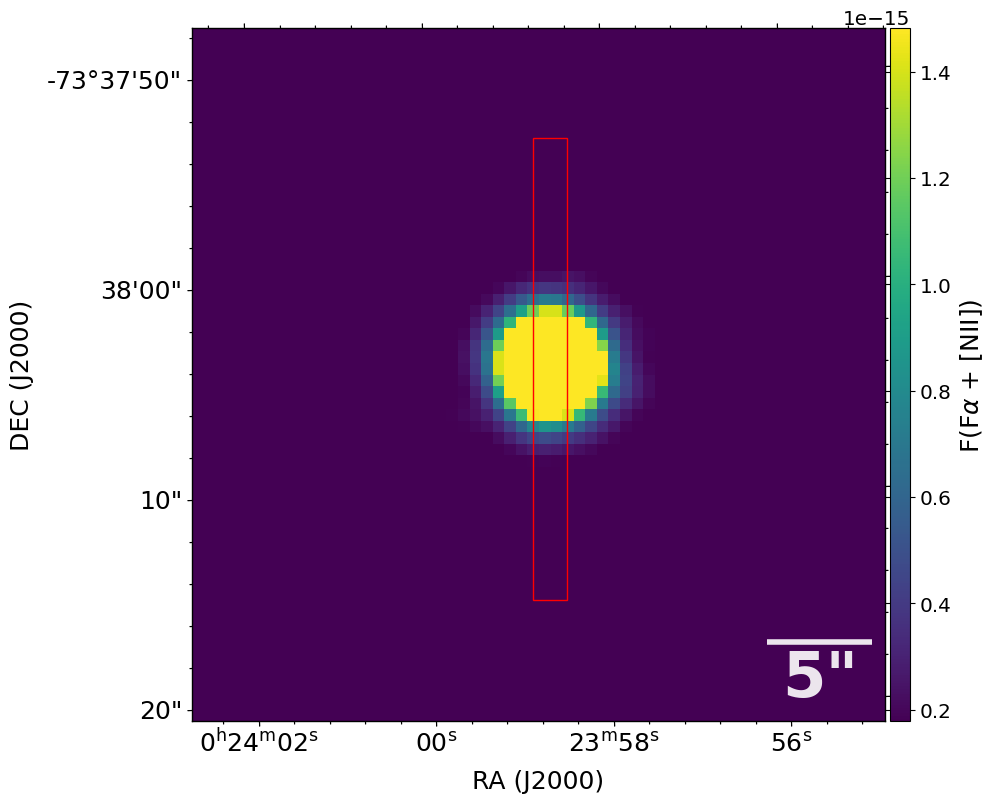

In [7]:
#Plotting
# show the image
m, s = np.mean(hdu[0].data), np.std(hdu[0].data)
plot_slit_with_aplpy(hdu, y_start, y_end, x_start, x_end, angle, m, s)

# Emission X/VLT-Shooter Spectra

In [8]:
hdu = fits.open("../PN_line_atlas_v1.fits")

In [9]:
hdu

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fc9884633d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc913b84d30>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc913b54b20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc913b54d00>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc913b54f40>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc913b701c0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc913b70400>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc913b70640>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc913b70880>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc913b70ac0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc913b70d00>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc913b70f40>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc913b081c0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc913b08400>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc913b08640>, <astropy.i

In [10]:
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of dimension 1                          
NAXIS2  =                   20 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    7 / number of table fields                         
TTYPE1  = 'NAME    '                                                            
TFORM1  = '20A     '                                                            
TTYPE2  = 'REF_HDU '                                                            
TFORM2  = 'K       '                                                            
TTYPE3  = 'REF_ORIGIN'      

In [11]:
extension_names = [ext.name for ext in hdu]

In [12]:
extension_names

['PRIMARY',
 'Star Catalog',
 'DdDm-1',
 'G025.3-04.6',
 'G042.9-06.9',
 'G205.8-26.7',
 'G295.3-09.3',
 'G334.8-07.4',
 'He2-436',
 'LMC-SMP-25',
 'LMC-SMP-31',
 'LMC-SMP-53',
 'LMC-SMP-58',
 'LMC-Sa-104a',
 'SMC-SMP-1',
 'SMC-SMP-2',
 'SMC-SMP-8',
 'SMC-SMP-13',
 'SMC-SMP-18',
 'SMC-SMP-20',
 'SMC-SMP-24',
 'SMC-SMP-25']

In [13]:
hdu["SMC-SMP-1"].columns

ColDefs(
    name = 'LINE'; format = '20A'
    name = 'WAVE_LAB'; format = 'D'; unit = 'Angstrom'
    name = 'WAVE_OBS'; format = 'D'; unit = 'Angstrom'
    name = 'WAVE_ERR'; format = 'D'; unit = 'Angstrom'
    name = 'FLUX'; format = 'D'; unit = 'erg/cm-2/s'
    name = 'FLUX_ERR'; format = 'D'; unit = 'erg/cm-2/s'
    name = 'WIDTH'; format = 'D'; unit = 'Angstrom'
    name = 'WIDTH_ERR'; format = 'D'; unit = 'Angstrom'
    name = 'FLAG'; format = 'D'
)

In [14]:
line = hdu["SMC-SMP-1"].data.field("LINE")
mask = hdu["SMC-SMP-1"].data.field("LINE") == "H$\\alpha$"
line_ha = line[mask]
line_ha

chararray(['H$\\alpha$'], dtype='<U20')

In [15]:
flux = hdu["SMC-SMP-1"].data.field("FLUX")
flux_ha = flux[mask]

In [16]:
flux_ha

array([5.49470305e-13])

In [17]:
# Filter extension names that start with "SMC"
extensions_starting_with_smc = [name for name in extension_names if name.startswith("SMC")]

In [18]:
extensions_starting_with_smc

['SMC-SMP-1',
 'SMC-SMP-2',
 'SMC-SMP-8',
 'SMC-SMP-13',
 'SMC-SMP-18',
 'SMC-SMP-20',
 'SMC-SMP-24',
 'SMC-SMP-25']

In [19]:
ha_central = 6600

In [20]:
# Create empty lists to store the filtered data
extension_names_list = []
wavelengths_list = []
flux_list = []

In [21]:
# Iterate through extensions starting with "SMC"
for name in extension_names:
    if name.startswith("SMC"):
        # Access the specific data fields in the extension
        line_data = hdu[name].data.field("LINE")
        flux_data = hdu[name].data.field("FLUX")
        wvobs_data = hdu[name].data.field("WAVE_OBS")

        # Filter the data for the specific wavelength range around H-alpha
        lines_within_range = [(wvobs, flux) for wvobs, flux in zip(wvobs_data, flux_data)
                                  if (ha_central - (138/2) <= wvobs <= ha_central + (138/2))]
            
        # Append the filtered data to the lists
        wavelengths, fluxes = zip(*lines_within_range)
        wavelengths_list.append(wavelengths)
        flux_list.append(fluxes)

        # Store extension names
        extension_names_list.append(name)


In [22]:
# Create a Pandas DataFrame to organize the data
data = {
    'Extension Name': extension_names_list,
    'Wavelengths within Range': wavelengths_list,
    'Fluxes within Range': flux_list
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

  Extension Name                           Wavelengths within Range  \
0      SMC-SMP-1  (6553.0637408641605, 6567.821537038354, 6583.1...   
1      SMC-SMP-2  (6553.51000174078, 6565.416766635332, 6568.098...   
2      SMC-SMP-8  (6552.788925756808, 6567.364336480378, 6588.12...   
3     SMC-SMP-13  (6553.400605080448, 6568.11135794641, 6583.508...   
4     SMC-SMP-18  (6552.770059305075, 6567.507477808056, 6582.79...   
5     SMC-SMP-20  (6552.103504840201, 6566.849310471623, 6582.10...   
6     SMC-SMP-24  (6552.888838775578, 6567.652267536342, 6588.28...   
7     SMC-SMP-25  (6552.980160567651, 6565.102701166069, 6567.85...   

                                 Fluxes within Range  
0  (1.2022578610051685e-14, 5.494703046298636e-13...  
1  (5.462622213390637e-15, -4.161905026811382e-10...  
2  (1.1403752283280212e-15, 4.791529148326006e-13...  
3  (7.68697740521025e-15, 8.259523934973338e-13, ...  
4  (1.5436682368707992e-14, 7.252845636297283e-13...  
5  (3.756015626893724e-15, 1.1

In [23]:
# Calculate mean and sum for wavelengths and fluxes within the DataFrame
df['Mean Wavelengths'] = df['Wavelengths within Range'].apply(lambda x: pd.Series(x).mean())
df['Sum Fluxes'] = df['Fluxes within Range'].apply(lambda x: pd.Series(x).sum())

# Display the DataFrame
print(df)


  Extension Name                           Wavelengths within Range  \
0      SMC-SMP-1  (6553.0637408641605, 6567.821537038354, 6583.1...   
1      SMC-SMP-2  (6553.51000174078, 6565.416766635332, 6568.098...   
2      SMC-SMP-8  (6552.788925756808, 6567.364336480378, 6588.12...   
3     SMC-SMP-13  (6553.400605080448, 6568.11135794641, 6583.508...   
4     SMC-SMP-18  (6552.770059305075, 6567.507477808056, 6582.79...   
5     SMC-SMP-20  (6552.103504840201, 6566.849310471623, 6582.10...   
6     SMC-SMP-24  (6552.888838775578, 6567.652267536342, 6588.28...   
7     SMC-SMP-25  (6552.980160567651, 6565.102701166069, 6567.85...   

                                 Fluxes within Range  Mean Wavelengths  \
0  (1.2022578610051685e-14, 5.494703046298636e-13...       6573.119863   
1  (5.462622213390637e-15, -4.161905026811382e-10...       6568.973895   
2  (1.1403752283280212e-15, 4.791529148326006e-13...       6569.424785   
3  (7.68697740521025e-15, 8.259523934973338e-13, ...       6573.

In [24]:
print(df["Extension Name"], df['Mean Wavelengths'], df['Sum Fluxes'])

0     SMC-SMP-1
1     SMC-SMP-2
2     SMC-SMP-8
3    SMC-SMP-13
4    SMC-SMP-18
5    SMC-SMP-20
6    SMC-SMP-24
7    SMC-SMP-25
Name: Extension Name, dtype: object 0    6573.119863
1    6568.973895
2    6569.424785
3    6573.444339
4    6572.808842
5    6572.122006
6    6569.609442
7    6568.585490
Name: Mean Wavelengths, dtype: float64 0    6.004163e-13
1   -4.156493e-10
2    4.852686e-13
3    8.589688e-13
4    7.908235e-13
5    1.134213e-12
6    6.920642e-13
7   -6.443660e-11
Name: Sum Fluxes, dtype: float64


In [25]:
df.to_csv('../flux-around-halpha.csv', index=False)
